In [23]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
from matplotlib import style

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [24]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [25]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [26]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June.
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6)

In [27]:
#  3. Convert the June temperatures to a list.
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

In [28]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df_jun = pd.DataFrame(results, columns=['date','June Temps'])

In [29]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df_jun.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [30]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12)

In [31]:
# 7. Convert the December temperatures to a list.
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [32]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df_dec = pd.DataFrame(results, columns=['date','December Temps'])

In [33]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_dec.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## D3. Additional Queries and Analysis

### June and December temps - Box and Whiskers Plot

Text(0.5, 0, 'Month')

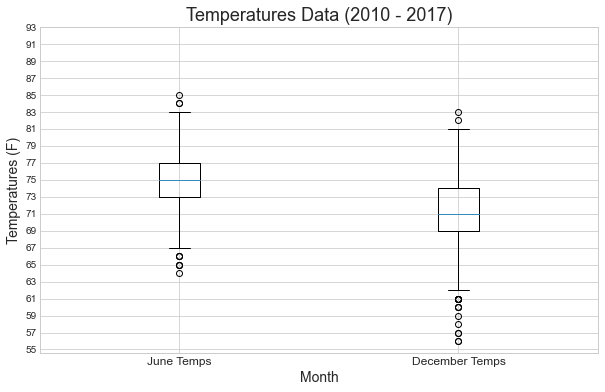

In [34]:
#Style
plt.style.use('seaborn-whitegrid')

#Plot the Box & Whiskers
x_labels = ["June Temps", "December Temps"]
temps = [df_jun["June Temps"], df_dec["December Temps"]]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(temps, labels=x_labels)


#Ticks & Labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

ax.set_yticks(np.arange(55, 95, step=2.0))
ax.set_title('Temperatures Data (2010 - 2017)',fontsize=18)
ax.set_ylabel('Temperatures (F)',fontsize=14)
ax.set_xlabel("Month",fontsize=14)

## Rainfall for June and December

### Descriptive Statistics

In [35]:
#Rain in June (2010 - 2017)
results = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
df_rain_june = pd.DataFrame(results, columns=['date','June Rain'])
df_rain_june.describe()

,June Rain
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [36]:
#Rain in December (2010 - 2017)
results01 = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()
df_rain_dec = pd.DataFrame(results01, columns=['date','Dec Rain'])
df_rain_dec.describe()

,Dec Rain
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


### June and December Rainfall - Box and Whiskers Plot

In [37]:
#Drop the null values:
df_rain_june = df_rain_june.dropna()
df_rain_dec = df_rain_dec.dropna()

Text(0.5, 0, 'Month')

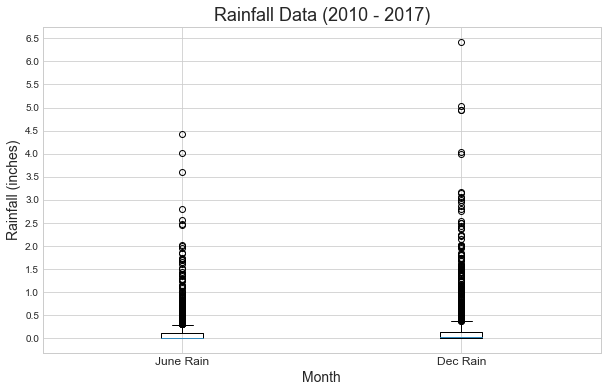

In [38]:
#Style
plt.style.use('seaborn-whitegrid')

#Plot the Box & Whiskers
x_labels = ["June Rain", "Dec Rain"]
temps = [df_rain_june["June Rain"], df_rain_dec["Dec Rain"]]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(temps, labels=x_labels)


#Ticks & Labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

ax.set_yticks(np.arange(0, 7, step=0.5))
ax.set_title('Rainfall Data (2010 - 2017)',fontsize=18)
ax.set_ylabel('Rainfall (inches)',fontsize=14)
ax.set_xlabel("Month",fontsize=14)

In [39]:
#Count the number of the outliers
#Calculate the sum of outliers_June
# Calculate the outliers
Q1_june = df_rain_june["June Rain"].quantile(0.25)
Q3_june = df_rain_june["June Rain"].quantile(0.75)
IQR_june = (df_rain_june["June Rain"].quantile(0.75)) - (df_rain_june["June Rain"].quantile(0.25))
#Calculate the sum of outliers
sum_of_outliers_june = ((df_rain_june["June Rain"] < (Q1_june - 1.5 * IQR_june))
                        | (df_rain_june["June Rain"] > (Q3_june + 1.5 * IQR_june))).sum()

sum_of_outliers_june

183

In [40]:
#Calculate the sum of outliers_Dec
# Calculate the outliers
Q1_dec = df_rain_dec["Dec Rain"].quantile(0.25)
Q3_dec = df_rain_dec["Dec Rain"].quantile(0.75)
IQR_dec = (df_rain_dec["Dec Rain"].quantile(0.75)) - (df_rain_dec["Dec Rain"].quantile(0.25))
#Calculate the sum of outliers
sum_of_outliers_dec = ((df_rain_dec["Dec Rain"] < (Q1_dec - 1.5 * IQR_dec))
                        | (df_rain_dec["Dec Rain"] > (Q3_dec + 1.5 * IQR_dec))).sum()

sum_of_outliers_dec

205

### Average Rainfall grouped by Year

In [41]:
#December Rain group by Year
#Set index to date
df_rain_dec_index = df_rain_dec.set_index(df_rain_dec['date'], inplace=False)

#Sort the dates
df_rain_dec_index = df_rain_dec_index.sort_index()

#Set the index date to the date datatype
df_rain_dec_index.index = pd.to_datetime(df_rain_dec_index.index)

#Group by year
df_rain_dec_index_year = df_rain_dec_index.resample("Y").mean()
df_rain_dec_index_year

,Dec Rain
date,
2010-12-31,0.459087
2011-12-31,0.201581
2012-12-31,0.089604
2013-12-31,0.169014
2014-12-31,0.188439
2015-12-31,0.169506
2016-12-31,0.199494


In [42]:
#June Rain by Year
df_rain_jun_index = df_rain_june.set_index(df_rain_june['date'], inplace=False)

#Sort the dates
df_rain_jun_index = df_rain_jun_index.sort_index()

#Set the index date to the date datatype
df_rain_jun_index.index = pd.to_datetime(df_rain_jun_index.index)

#Group by year
df_rain_jun_index_year = df_rain_jun_index.resample("Y").mean()
df_rain_jun_index_year

##Note: Grouping shows month 12, instead 6.

,June Rain
date,
2010-12-31,0.042241
2011-12-31,0.240142
2012-12-31,0.097062
2013-12-31,0.144195
2014-12-31,0.124372
2015-12-31,0.125160
2016-12-31,0.212312
2017-12-31,0.120000


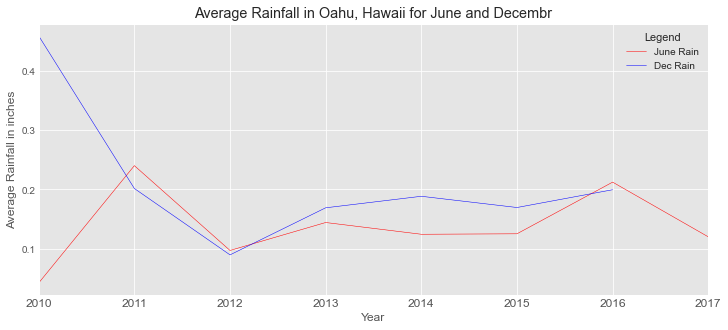

In [43]:
#June and December - graph - by year
#Style
style.use('ggplot')

#Plot the graph
ax = df_rain_jun_index_year.plot(c='red', linewidth=0.5)
df_rain_dec_index_year.plot(ax=ax, c='blue', figsize=(12, 5), linewidth=0.5)

#Labels
ax.set_xlabel('Year')
ax.set_ylabel("Average Rainfall in inches")
ax.set_title("Average Rainfall in Oahu, Hawaii for June and Decembr")

#Ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

#Plot the legend
lgnd = plt.legend(fontsize="10", mode="Expanded",
         loc="best", title="Legend")
lgnd.get_title().set_fontsize(11)
plt.show()